In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels as sm
import seaborn as sns



In [3]:
import scipy.stats as stats


In [4]:
#df = pd.read_csv(r"C:/Users/Usuario/Documents/Minor/Manuel/Comunas.csv", encoding='latin1')

#df = df.apply(lambda x: x.str.replace(',', '.') if x.dtype == "object" else x)

#df.to_csv('C:/Users/Usuario/Documents/Minor/Manuel/Evaluación/Comunas.csv', index=False)
#df.info()

#Para ver cantidad de filas, columnas, nombres de las columnas, número de no nulos por columna, el tipo de datos y la memoria del df

In [37]:
df = pd.read_csv(r"comunas.csv", encoding='latin1')


In [6]:
#Ver nulos por columna
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)

#Ver cantidad de nulos por columna
hay_nulos = df.isnull().values.any()
print("¿Existen datos nulos en el DataFrame? {}".format('Sí' if hay_nulos else 'No'))

region      0
comunas     0
P1          0
P2          0
P3          0
EJH         0
ICE         0
CPF         0
EST         0
PM          0
PI          0
Tramo 40    0
SA          0
AR          0
PO          0
OCP         0
IDC         0
HM          0
dtype: int64
¿Existen datos nulos en el DataFrame? No


In [38]:
df.describe()

,P1,P2,P3,EJH,ICE,CPF,EST,PM,PI,Tramo 40,SA,AR,PO,OCP,IDC,HM
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.209302,0.077093,0.716744,8.641860,-0.271744,0.432149,0.747791,0.300733,0.196502,0.650566,0.205449,0.376107,0.181580,0.417216,0.334224,0.092343
std,0.113332,0.041013,0.102938,1.193656,0.742646,0.247336,0.053631,0.114168,0.077800,0.079189,0.189031,0.234249,0.209063,0.139049,0.106223,0.017317
min,0.010000,0.030000,0.480000,6.500000,-1.130000,0.001500,0.470000,0.109500,0.072700,0.483900,0.000800,0.000900,0.006600,0.142500,0.158400,0.047600
25%,0.122500,0.050000,0.650000,7.800000,-0.710000,0.244800,0.720000,0.221350,0.142350,0.598200,0.025075,0.184975,0.019325,0.321700,0.258250,0.081525
50%,0.205000,0.070000,0.720000,8.400000,-0.480000,0.442450,0.750000,0.285850,0.184300,0.655000,0.198200,0.375400,0.063300,0.402150,0.311300,0.091800
75%,0.290000,0.100000,0.777500,9.000000,-0.005000,0.597325,0.780000,0.354275,0.240675,0.700175,0.324725,0.575450,0.286875,0.474950,0.405700,0.101900
max,0.470000,0.300000,0.920000,12.500000,2.880000,0.999000,0.850000,0.607300,0.416000,0.820200,0.663200,1.000000,0.798500,0.755400,0.640000,0.137700


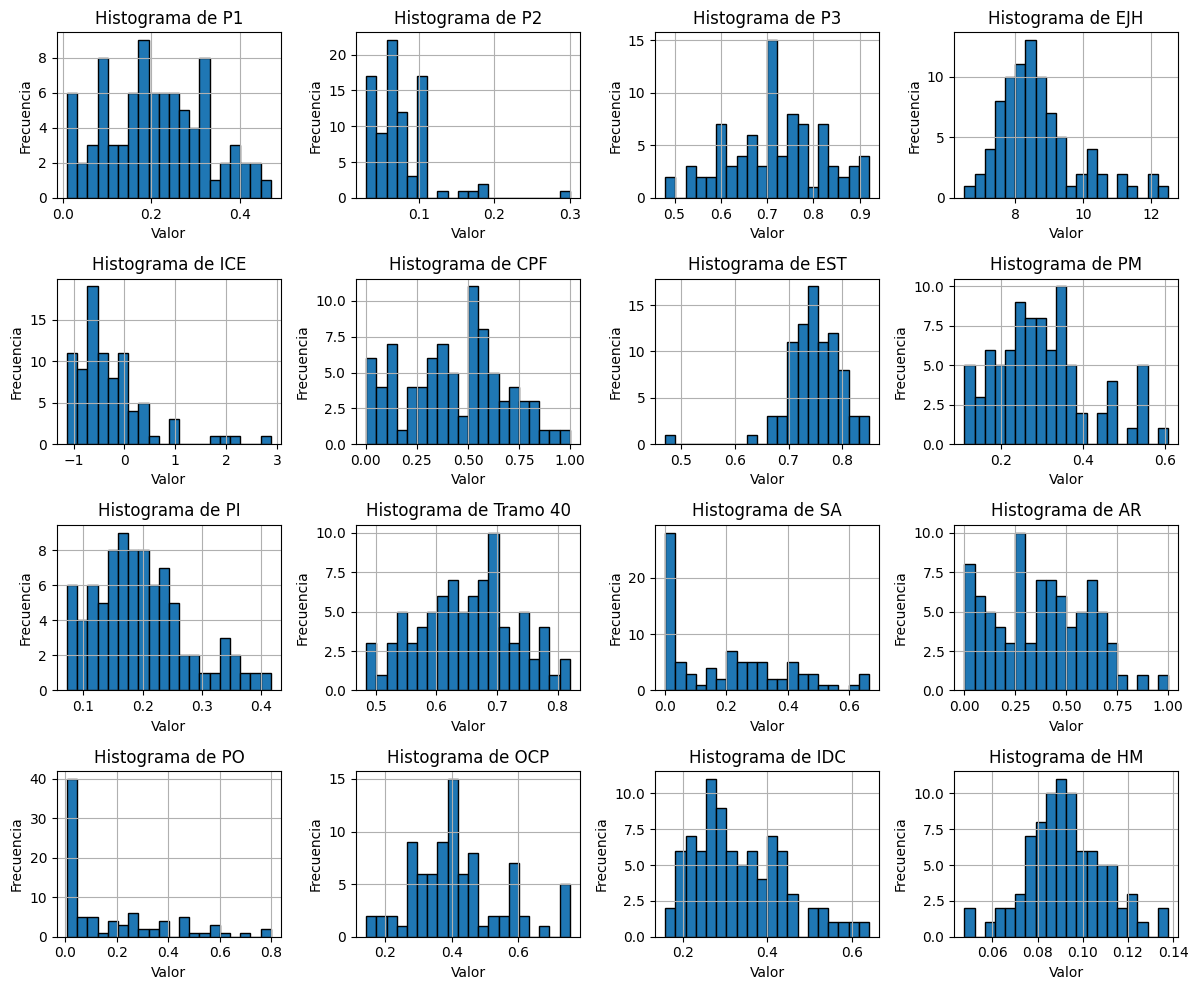

In [8]:
numeric_columns = ['P1', 'P2', 'P3', 'EJH', 'ICE', 'CPF', 'EST', 'PM', 'PI', 'Tramo 40', 'SA', 'AR', 'PO', 'OCP', 'IDC', 'HM']

#df[numeric_columns] = df[numeric_columns].astype(str).apply(lambda x: x.str.replace(',', '.'))

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

plt.figure(figsize=(12, 10))

for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(4, 4, i)
    plt.hist(df[column], bins=20, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.grid(True)

plt.tight_layout()
plt.show()

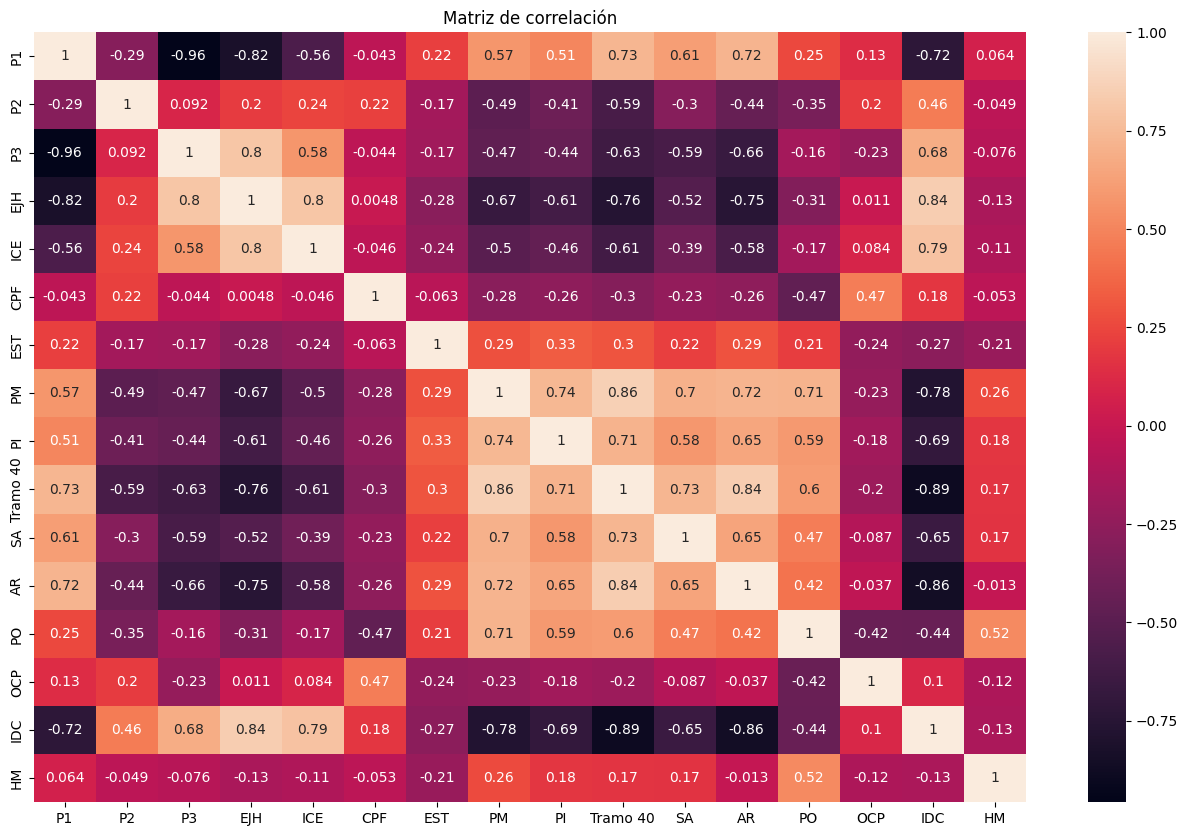

In [9]:
coef = df[numeric_columns].corr(method='pearson')

plt.figure(figsize=(16,10))
sns.heatmap(coef,annot=True)
plt.title('Matriz de correlación')
plt.show()

In [10]:
df.describe()

,P1,P2,P3,EJH,ICE,CPF,EST,PM,PI,Tramo 40,SA,AR,PO,OCP,IDC,HM
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.209302,0.077093,0.716744,8.641860,-0.271744,0.432149,0.747791,0.300733,0.196502,0.650566,0.205449,0.376107,0.181580,0.417216,0.334224,0.092343
std,0.113332,0.041013,0.102938,1.193656,0.742646,0.247336,0.053631,0.114168,0.077800,0.079189,0.189031,0.234249,0.209063,0.139049,0.106223,0.017317
min,0.010000,0.030000,0.480000,6.500000,-1.130000,0.001500,0.470000,0.109500,0.072700,0.483900,0.000800,0.000900,0.006600,0.142500,0.158400,0.047600
25%,0.122500,0.050000,0.650000,7.800000,-0.710000,0.244800,0.720000,0.221350,0.142350,0.598200,0.025075,0.184975,0.019325,0.321700,0.258250,0.081525
50%,0.205000,0.070000,0.720000,8.400000,-0.480000,0.442450,0.750000,0.285850,0.184300,0.655000,0.198200,0.375400,0.063300,0.402150,0.311300,0.091800
75%,0.290000,0.100000,0.777500,9.000000,-0.005000,0.597325,0.780000,0.354275,0.240675,0.700175,0.324725,0.575450,0.286875,0.474950,0.405700,0.101900
max,0.470000,0.300000,0.920000,12.500000,2.880000,0.999000,0.850000,0.607300,0.416000,0.820200,0.663200,1.000000,0.798500,0.755400,0.640000,0.137700


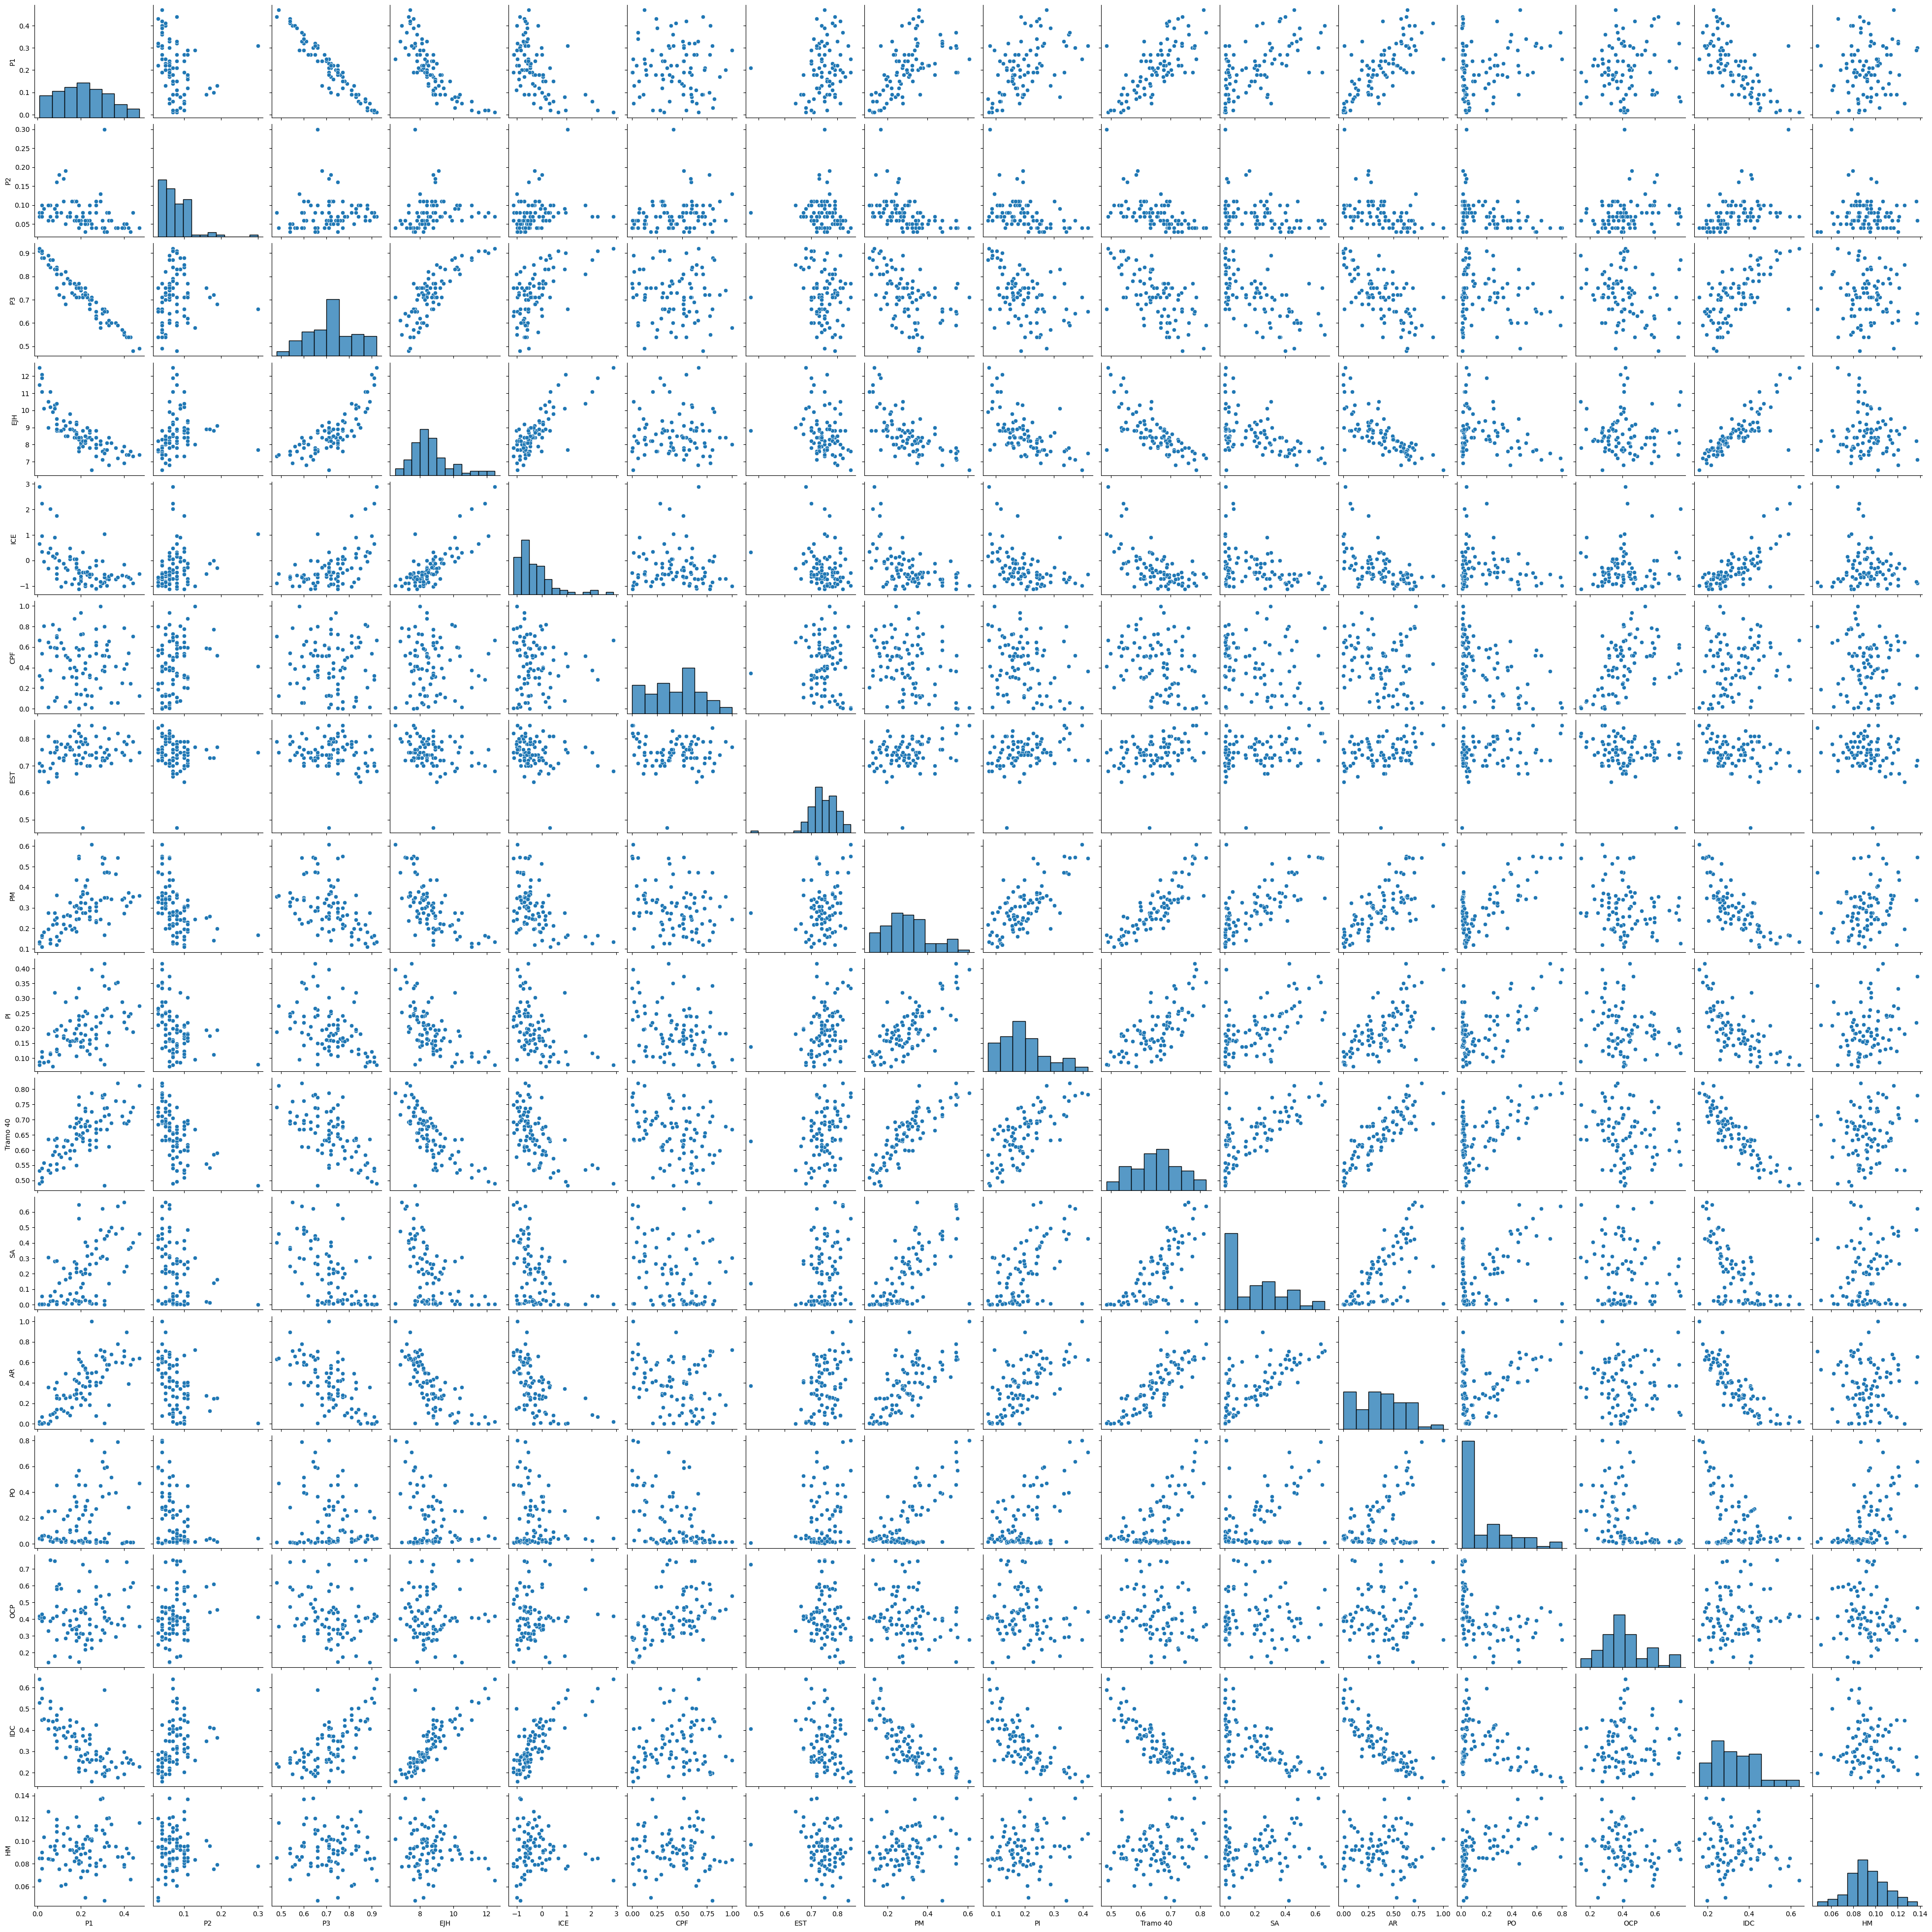

In [11]:
sns.pairplot(df)

In [12]:
print(df.columns)
df.columns = df.columns.str.strip()

Index(['region', 'comunas', 'P1', 'P2', 'P3', 'EJH', 'ICE', 'CPF', 'EST', 'PM',
       'PI', 'Tramo 40', 'SA', 'AR', 'PO', 'OCP', 'IDC', 'HM'],
      dtype='object')


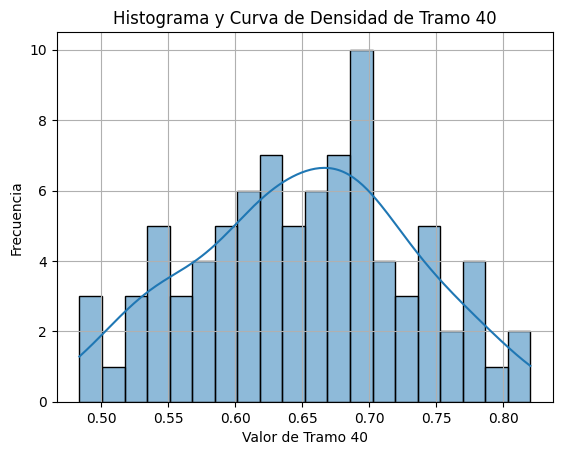

In [13]:
#Análisis exploratorio para HM

#Histograma
sns.histplot(df['Tramo 40'], kde=True, bins=20, edgecolor='black')
plt.title('Histograma y Curva de Densidad de Tramo 40')
plt.xlabel('Valor de Tramo 40')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

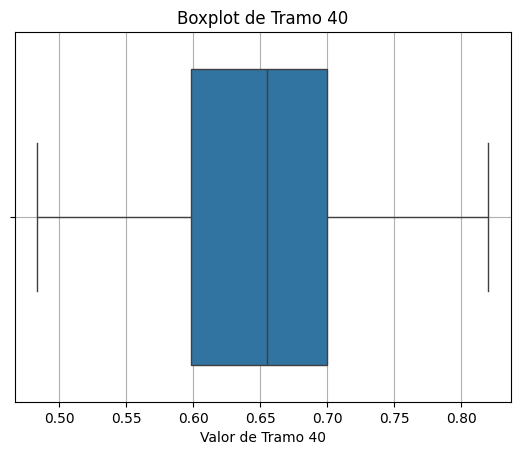

In [14]:
#Boxplot
sns.boxplot(x=df['Tramo 40'])
plt.title('Boxplot de Tramo 40')
plt.xlabel('Valor de Tramo 40')
plt.grid(True)
plt.show()

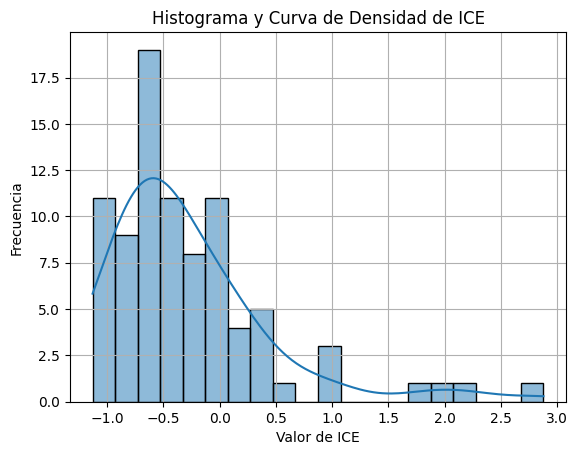

In [15]:
#HISTOGRAMA ICE

sns.histplot(df['ICE'], kde=True, bins=20, edgecolor='black')
plt.title('Histograma y Curva de Densidad de ICE')
plt.xlabel('Valor de ICE')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

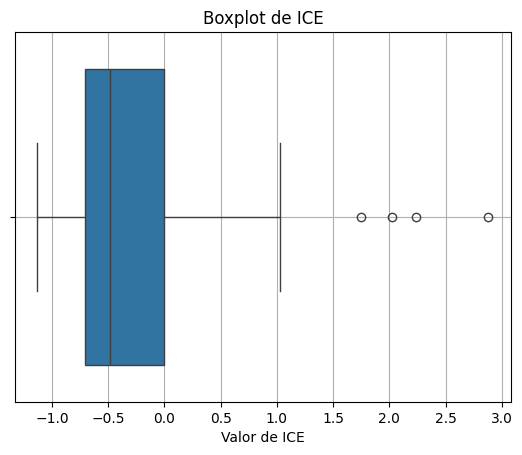

In [16]:
#Boxplot ICE

sns.boxplot(x=df['ICE'])
plt.title('Boxplot de ICE')
plt.xlabel('Valor de ICE')
plt.grid(True)
plt.show()

In [17]:
import numpy as np
from scipy.stats import beta, kstest

# Parámetros de la distribución beta
a, b = 2, 5  # puedes ajustar estos parámetros

# Generar una muestra de datos de una distribución beta
sample = df['ICE']

# Realizar el test de Kolmogorov-Smirnov
d, p_value = kstest(sample, 'beta', args=(a, b))

print(f'Estadístico D: {d}')
print(f'Valor p: {p_value}')

Estadístico D: 0.7695517532703489
Valor p: 5.93508379406389e-54


Text(0, 0.5, 'P1')

<Figure size 1200x800 with 0 Axes>

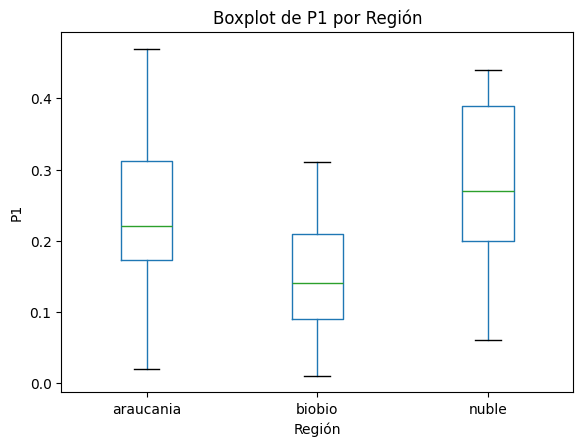

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
df.boxplot(column='P1', by='region', grid=False)
plt.title('Boxplot de P1 por Región')
plt.suptitle('')
plt.xlabel('Región')
plt.ylabel('P1')

In [19]:
#Verificar normalidad de los datos. p-valor bajo a 0.05 indica que la hipótesis nula de normalidad puede ser rechazada.

shapiro_test = stats.shapiro(df['Tramo 40'])
print("Prueba de Shapiro-Wilk para Tramo 40:")
print(f"Estadístico: {shapiro_test.statistic}, p-valor: {shapiro_test.pvalue}")

Prueba de Shapiro-Wilk para Tramo 40:
Estadístico: 0.9867154577277653, p-valor: 0.528729199324625


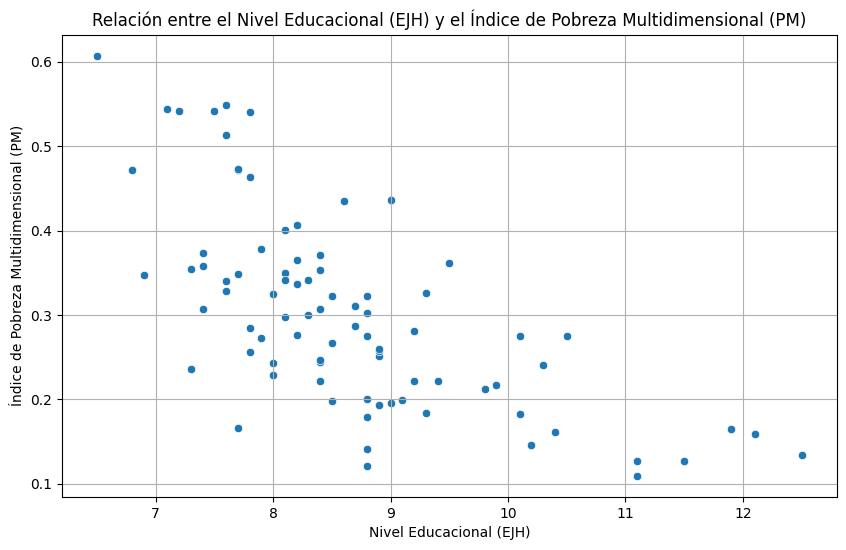

La correlación entre PM e EJH es: -0.668875931479714


In [20]:
#Analisis bivariado

df['PM'] = df['PM'].astype(str).str.replace(',', '.').astype(float)
df['EJH'] = df['EJH'].astype(str).str.replace(',', '.').astype(float)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='EJH', y='PM', data=df)
plt.title('Relación entre el Nivel Educacional (EJH) y el Índice de Pobreza Multidimensional (PM)')
plt.xlabel('Nivel Educacional (EJH)')
plt.ylabel('Índice de Pobreza Multidimensional (PM)')
plt.grid(True)
plt.show()

correlacion = df['PM'].corr(df['EJH'])
print(f'La correlación entre PM e EJH es: {correlacion}')

In [21]:
#MINIMO CUADRADOS

def Estimar_coeficientes(X,y, grado:int = 1): # X e Y son arreglos con los datos.
    X = np.column_stack([X**i for i in range(grado + 1)]) # Agregar una columna de 1's.
    coeficientes = np.linalg.inv(X.T @ X) @ X.T @ y  # Resolver sistema. En NumPy el producto de matrices se hace con "@"
    return coeficientes

In [22]:
X = df['EJH'].to_numpy()  
y = df['PM'].to_numpy()  

Coef_EJH_PM = Estimar_coeficientes(X,y,grado=2)  # grado 1 tiene la forma y = b + ax
Coef_EJH_PM

array([ 1.93799841, -0.30167744,  0.01274528])

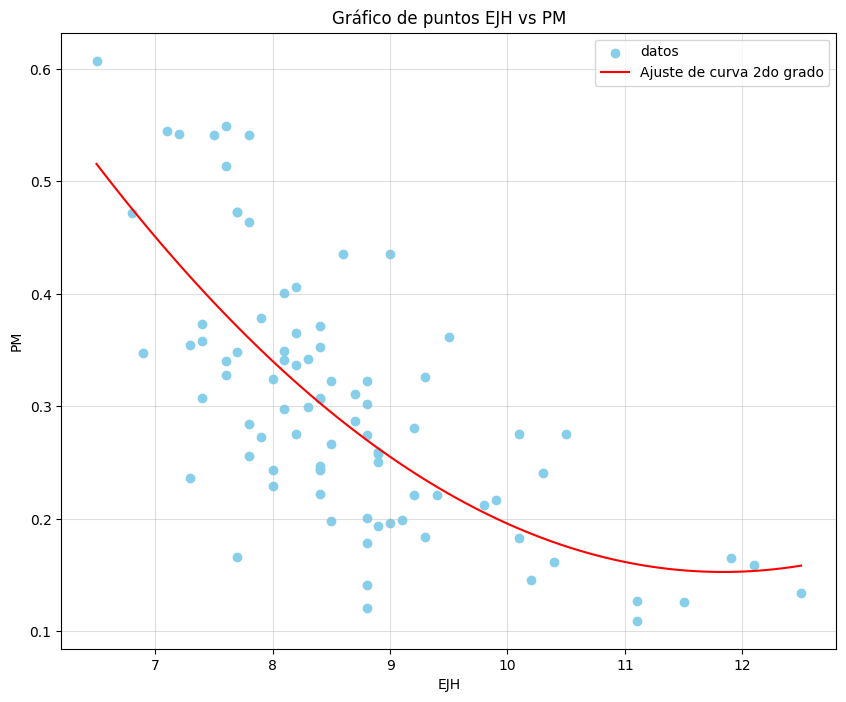

In [23]:
import matplotlib.pyplot as plt

X = df['EJH'].to_numpy()
Y = df['PM'].to_numpy()


dom = np.linspace(min(X),max(X),100)
rec = Coef_EJH_PM[0] + Coef_EJH_PM[1]*dom + Coef_EJH_PM[2]*dom**2


plt.figure(figsize=(10,8))
plt.scatter(X,Y, alpha=1, color='skyblue')
plt.plot(dom,rec,color='red')
plt.xlabel('EJH')
plt.ylabel('PM')
plt.title('Gráfico de puntos EJH vs PM')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva 2do grado'])
plt.show()

In [24]:
def calculate_statistics(data):
    mean = np.mean(data)  # Calcula la media
    std_dev = np.std(data)  # Calcula la desviación estándar
    minimum = np.min(data)  # Calcula el valor mínimo
    maximum = np.max(data)  # Calcula el valor máximo
    return {'mean': mean, 'std_dev': std_dev, 'min': minimum, 'max': maximum}

#REVISAR DATOS DE HM

newHM = [0.0813, 0.0476, 0.0822, 0.0775, 0.0856, 0.0836, 0.0781, 0.0972, 
        0.0792, 0.0936, 0.0681, 0.0986, 0.0842, 0.0913, 0.0921, 0.0864, 
        0.1101, 0.0738, 0.0806, 0.0662, 0.0792, 0.1018, 0.0622, 0.0854, 
        0.0755, 0.09, 0.0849, 0.0654, 0.1131, 0.0954, 0.1191, 0.0735, 
        0.0901, 0.1085, 0.1006, 0.1137, 0.1118, 0.0888, 0.1262, 0.102, 
        0.0959, 0.0706, 0.1035, 0.0503, 0.0791, 0.0759, 0.0608, 0.0989, 
        0.0883, 0.0782, 0.0949, 0.0837, 0.0923, 0.0829, 0.0923, 0.094, 
        0.1204, 0.0937, 0.0955, 0.0891, 0.1095, 0.1019, 0.0957, 0.0747, 
        0.1007, 0.1066, 0.1202, 0.1377, 0.1012, 0.0892, 0.1065, 0.1039, 
        0.0844, 0.0915, 0.1213, 0.0851, 0.0803, 0.0956, 0.1162, 0.0854, 
        0.0958, 0.1019, 0.1134, 0.115, 0.0863, 0.1367]

statistics = calculate_statistics(newHM)
print(statistics)

{'mean': 0.09234302325581395, 'std_dev': 0.017216369581232818, 'min': 0.0476, 'max': 0.1377}


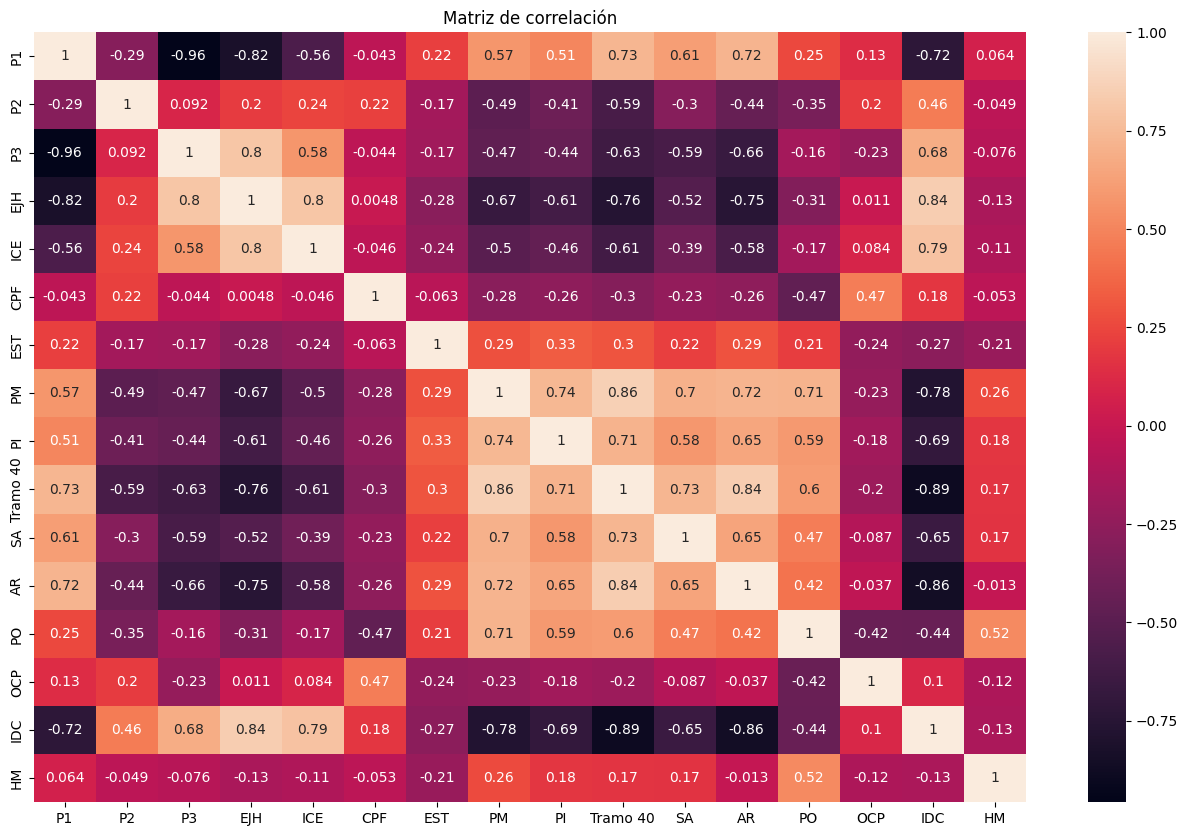

In [25]:
coef = df[numeric_columns].corr(method='pearson')

plt.figure(figsize=(16,10))
sns.heatmap(coef,annot=True)
plt.title('Matriz de correlación')
plt.show()

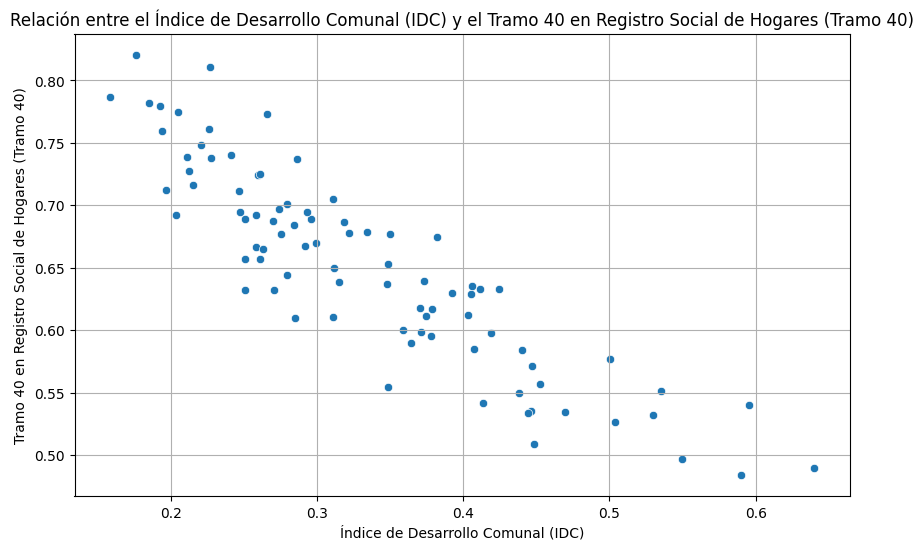

La correlación entre IDC y Tramo 40 es: -0.8925605351268368


In [39]:
df['IDC'] = df['IDC'].astype(str).str.replace(',', '.').astype(float)
df['Tramo 40'] = df['Tramo 40'].astype(str).str.replace(',', '.').astype(float)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='IDC', y='Tramo 40', data=df)
plt.title('Relación entre el Índice de Desarrollo Comunal (IDC) y el Tramo 40 en Registro Social de Hogares (Tramo 40)')
plt.xlabel('Índice de Desarrollo Comunal (IDC)')
plt.ylabel('Tramo 40 en Registro Social de Hogares (Tramo 40)')
plt.grid(True)
plt.show()

correlacion = df['IDC'].corr(df['Tramo 40'])
print(f'La correlación entre IDC y Tramo 40 es: {correlacion}')

In [27]:
#MINIMO CUADRADOS

def Estimar_coeficientes(X,y, grado:int = 1): # X e Y son arreglos con los datos.
    X = np.column_stack([X**i for i in range(grado + 1)]) # Agregar una columna de 1's.
    coeficientes = np.linalg.inv(X.T @ X) @ X.T @ y  # Resolver sistema. En NumPy el producto de matrices se hace con "@"
    return coeficientes

In [28]:
X = df['IDC'].to_numpy()  # vector con los datos de P1
y = df['Tramo 40'].to_numpy()  # vector con los datos de P3

Coef_IDC_Tramo40 = Estimar_coeficientes(X,y,grado=2)  # grado 1 tiene la forma y = b + ax
Coef_IDC_Tramo40

array([ 0.96643269, -1.21966915,  0.74701431])

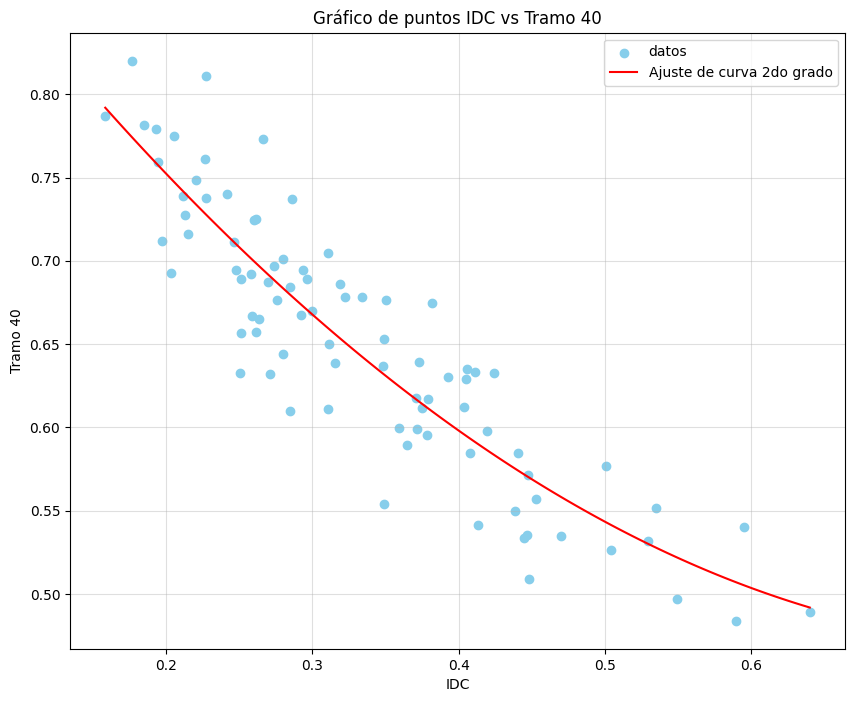

In [42]:
import matplotlib.pyplot as plt

X = df['IDC'].to_numpy()
Y = df['Tramo 40'].to_numpy()


dom = np.linspace(min(X),max(X),100)
rec = Coef_IDC_Tramo40[0] + Coef_IDC_Tramo40[1]*dom + Coef_IDC_Tramo40[2]*dom**2


plt.figure(figsize=(10,8))
plt.scatter(X,Y, alpha=1, color='skyblue')
plt.plot(dom,rec,color='red')
plt.xlabel('IDC')
plt.ylabel('Tramo 40')
plt.title('Gráfico de puntos IDC vs Tramo 40')
plt.grid(alpha=0.4)
plt.legend(['datos', 'Ajuste de curva 2do grado'])
plt.show()

In [30]:
import pandas as pd

data = {
    'Tramo 40': [0.6768, 0.7119, 0.5988, 0.7596, 0.7404, 0.667, 0.6926, 0.6291, 0.6891, 0.6871, 0.7013, 0.6675, 0.5513, 0.5999, 0.5957, 0.7116, 0.6572, 0.6944, 0.6697, 0.7243, 0.5897, 0.7871, 
                 0.6319, 0.5495, 0.5847, 0.6748, 0.5319, 0.4894, 0.6923, 0.5263, 0.5356, 0.6567, 0.509, 0.6125, 0.5542, 0.6327, 0.63, 0.5347, 0.5337, 0.6171, 0.5414, 0.6096, 0.5572, 0.6842, 
                 0.6324, 0.4971, 0.5769, 0.6368, 0.6443, 0.4839, 0.7377, 0.5845, 0.6174, 0.6499, 0.5717, 0.6391, 0.7163, 0.7748, 0.7614, 0.6944, 0.7731, 0.598, 0.6863, 0.6781, 0.7252, 0.6114, 
                 0.739, 0.7794, 0.7372, 0.6767, 0.7817, 0.665, 0.6333, 0.6533, 0.7048, 0.5404, 0.7486, 0.6108, 0.8108, 0.6783, 0.6333, 0.7275, 0.6384, 0.6892, 0.8202, 0.6968],
    'IDC': [0.4586, 0.4062, 0.4499, 0.5768, 0.6201, 0.5394, 0.4909, 0.7285, 0.3615, 0.7414, 0.3164, 0.7481, 0.7554, 0.6873, 0.7478, 0.4026, 0.5173, 0.2834, 0.5925, 0.5917, 0.4567, 0.277, 
            0.2867, 0.3522, 0.6101, 0.3458, 0.4075, 0.418, 0.3597, 0.388, 0.2767, 0.4496, 0.4096, 0.4788, 0.5963, 0.3582, 0.3192, 0.5803, 0.3289, 0.3682, 0.4429, 0.5957, 0.41, 0.2483, 
            0.4017, 0.3892, 0.584, 0.3126, 0.4423, 0.4122, 0.3193, 0.4066, 0.339, 0.5691, 0.3919, 0.3125, 0.4044, 0.2924, 0.2953, 0.476, 0.3374, 0.3631, 0.2729, 0.1751, 0.2267, 0.3693, 
            0.3935, 0.4673, 0.4364, 0.4718, 0.4441, 0.2786, 0.1425, 0.338, 0.4006, 0.4302, 0.1451, 0.548, 0.3575, 0.3161, 0.1788, 0.2199, 0.42, 0.376, 0.3691, 0.2739]
}

df = pd.DataFrame(data)

In [31]:
import statsmodels.api as sm

#X = df['IDC']
#Y = df['Tramo 40']

#X = sm.add_constant(X)
#model = sm.OLS(Y, X).fit()

#print(model.summary())

In [32]:
from scipy.stats import shapiro

residuals = model.resid

stat, p_value = shapiro(residuals)
print('Estadístico:', stat)
print('p-valor:', p_value)

NameError: name 'model' is not defined

In [ ]:
#Eliminamos el mayor pues quizás en su ausencia el resto de valores disminuya EST

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

columns_to_use = ['P1', 'P2', 'P3', 'EJH', 'ICE', 'CPF', 'PM', 'PI', 'SA', 'AR', 'PO', 'OCP', 'IDC', 'HM']
columns_to_use = [col for col in columns_to_use if col in numeric_columns]

X = df[columns_to_use]
y = df['Tramo 40']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Tramo 40   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.410
Date:                Tue, 02 Jul 2024   Prob (F-statistic):             0.0683
Time:                        18:47:38   Log-Likelihood:                 98.269
No. Observations:                  86   AIC:                            -192.5
Df Residuals:                      84   BIC:                            -187.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6975      0.027     26.050      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

columns_to_use = ['P1', 'P2', 'P3', 'EJH', 'ICE', 'CPF', 'PM', 'PI', 'SA', 'PO', 'OCP', 'IDC', 'HM']
columns_to_use = [col for col in columns_to_use if col in numeric_columns]

X = df[columns_to_use]
y = df['Tramo 40']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Tramo 40   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.410
Date:                Tue, 02 Jul 2024   Prob (F-statistic):             0.0683
Time:                        18:47:38   Log-Likelihood:                 98.269
No. Observations:                  86   AIC:                            -192.5
Df Residuals:                      84   BIC:                            -187.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6975      0.027     26.050      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

columns_to_use = ['P1', 'P3', 'EJH', 'ICE', 'CPF', 'PM', 'PI', 'SA', 'PO', 'OCP', 'IDC', 'HM']
columns_to_use = [col for col in columns_to_use if col in numeric_columns]

X = df[columns_to_use]
y = df['Tramo 40']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Tramo 40   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.410
Date:                Tue, 02 Jul 2024   Prob (F-statistic):             0.0683
Time:                        18:47:38   Log-Likelihood:                 98.269
No. Observations:                  86   AIC:                            -192.5
Df Residuals:                      84   BIC:                            -187.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6975      0.027     26.050      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

columns_to_use = ['P1', 'P3', 'ICE', 'CPF', 'PM', 'PI', 'SA', 'PO', 'OCP', 'IDC', 'HM']
columns_to_use = [col for col in columns_to_use if col in numeric_columns]

X = df[columns_to_use]
y = df['Tramo 40']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Tramo 40   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.410
Date:                Tue, 02 Jul 2024   Prob (F-statistic):             0.0683
Time:                        18:47:38   Log-Likelihood:                 98.269
No. Observations:                  86   AIC:                            -192.5
Df Residuals:                      84   BIC:                            -187.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6975      0.027     26.050      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

columns_to_use = ['P1', 'P3',  'ICE', 'CPF', 'PM', 'PI', 'SA', 'PO', 'IDC', 'HM']
columns_to_use = [col for col in columns_to_use if col in numeric_columns]

X = df[columns_to_use]
y = df['Tramo 40']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Tramo 40   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.410
Date:                Tue, 02 Jul 2024   Prob (F-statistic):             0.0683
Time:                        18:47:38   Log-Likelihood:                 98.269
No. Observations:                  86   AIC:                            -192.5
Df Residuals:                      84   BIC:                            -187.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6975      0.027     26.050      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

columns_to_use = ['P1', 'P3', 'CPF', 'PM', 'PI', 'SA', 'PO', 'IDC', 'HM']
columns_to_use = [col for col in columns_to_use if col in numeric_columns]

X = df[columns_to_use]
y = df['Tramo 40']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Tramo 40   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.410
Date:                Tue, 02 Jul 2024   Prob (F-statistic):             0.0683
Time:                        18:47:38   Log-Likelihood:                 98.269
No. Observations:                  86   AIC:                            -192.5
Df Residuals:                      84   BIC:                            -187.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6975      0.027     26.050      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

columns_to_use = ['P1', 'P3', 'CPF', 'PM', 'SA', 'PO', 'IDC', 'HM']
columns_to_use = [col for col in columns_to_use if col in numeric_columns]

X = df[columns_to_use]
y = df['Tramo 40']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Tramo 40   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.410
Date:                Tue, 02 Jul 2024   Prob (F-statistic):             0.0683
Time:                        18:47:38   Log-Likelihood:                 98.269
No. Observations:                  86   AIC:                            -192.5
Df Residuals:                      84   BIC:                            -187.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6975      0.027     26.050      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

columns_to_use = ['P1', 'P3', 'PM', 'SA', 'PO', 'IDC', 'HM']
columns_to_use = [col for col in columns_to_use if col in numeric_columns]

X = df[columns_to_use]
y = df['Tramo 40']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Tramo 40   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.410
Date:                Tue, 02 Jul 2024   Prob (F-statistic):             0.0683
Time:                        18:47:38   Log-Likelihood:                 98.269
No. Observations:                  86   AIC:                            -192.5
Df Residuals:                      84   BIC:                            -187.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6975      0.027     26.050      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

columns_to_use = ['P1', 'P3', 'SA', 'PO', 'IDC', 'HM']
columns_to_use = [col for col in columns_to_use if col in numeric_columns]

X = df[columns_to_use]
y = df['Tramo 40']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Tramo 40   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.410
Date:                Tue, 02 Jul 2024   Prob (F-statistic):             0.0683
Time:                        18:47:38   Log-Likelihood:                 98.269
No. Observations:                  86   AIC:                            -192.5
Df Residuals:                      84   BIC:                            -187.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6975      0.027     26.050      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

columns_to_use = ['P1', 'P3', 'SA', 'PO', 'IDC']
columns_to_use = [col for col in columns_to_use if col in numeric_columns]

X = df[columns_to_use]
y = df['Tramo 40']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Tramo 40   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.410
Date:                Tue, 02 Jul 2024   Prob (F-statistic):             0.0683
Time:                        18:47:38   Log-Likelihood:                 98.269
No. Observations:                  86   AIC:                            -192.5
Df Residuals:                      84   BIC:                            -187.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6975      0.027     26.050      0.0

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el mapa de Chile usando geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
chile = world[(world.name == "Chile")]

# Crear un DataFrame de las regiones con colores específicos
regions = ['La Araucanía', 'Ñuble', 'Biobío']
colors = ['red', 'blue', 'green']

# Cargar datos de las regiones de Chile (este archivo puede necesitar ser descargado y cargado localmente)
regiones = gpd.read_file("https://github.com/simonepri/geo-maps/raw/master/data/countries/CHL/regions.json")

# Filtrar las regiones específicas
selected_regions = regiones[regiones['name'].isin(regions)]

# Plotear el mapa
fig, ax = plt.subplots(1, 1, figsize=(8, 12))

# Plotear todo Chile en gris
chile.boundary.plot(ax=ax, linewidth=1, color='black')
regiones.plot(ax=ax, color='lightgrey')

# Plotear las regiones seleccionadas en colores específicos
for region, color in zip(regions, colors):
    selected_region = selected_regions[selected_regions['name'] == region]
    selected_region.plot(ax=ax, color=color, label=region)

# Ajustes finales del plot
plt.title("Mapa de Chile con Regiones Destacadas", fontsize=16)
plt.legend(loc='upper right')

# Quitar ejes
ax.set_axis_off()

# Guardar la imagen
plt.savefig('/mnt/data/mapa_chile_regiones.png', bbox_inches='tight', dpi=300)
plt.show()


AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [ ]:
# Load the image
image_path = "eje.png"
map_img = Image.open(image_path)

# Prepare to draw on the image
draw = ImageDraw.Draw(map_img)

# Define coordinates for regions (these are approximate and should be adjusted as needed)
# Ñuble
draw.polygon([(215, 500), (215, 540), (230, 540), (230, 500)], outline="black", fill="yellow")

# Biobío
draw.polygon([(215, 540), (215, 590), (230, 590), (230, 540)], outline="black", fill="yellow")

# La Araucanía
draw.polygon([(215, 590), (215, 640), (230, 640), (230, 590)], outline="black", fill="yellow")

# Save the modified image
output_path = "/mnt/data/mapa_chile_colores.png"
map_img.save(output_path)
map_img.show()


NameError: name 'Image' is not defined